<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/%EC%97%B0%EC%8A%B5/caret%ED%8C%A8%ED%82%A4%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**caret**<br>
2022.06.13

# 1. 라이브러리 및 데이터 로드

In [ ]:
install.packages(c("tidyvers","skimr","magrittr", "pacman"))
install.packages(c("leaps","ksvm","e1071","caret", "xgboost", "pROC"))

In [2]:
pacman:: p_load( "tidyvers","skimr","magrittr",  "leaps","ksvm","e1071","caret", "xgboost", "pROC" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘tidyvers’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“'BiocManager' not available.  Could not check Bioconductor.

Please use `install.packages('BiocManager')` and then retry.”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tidyvers’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘dataExplorer’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/

In [3]:
system("gdown --id 1FruZr0kLCSwYBgSm7HJibK9JHh1allu9")

In [4]:
df=read.csv("credit_final.csv", stringsAsFactors = TRUE)

# 2. EDA

[예제]

In [22]:
install.packages("AppliedPredictiveModeling")
library(AppliedPredictiveModeling)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plotrix’, ‘rpart.plot’, ‘CORElearn’, ‘ellipse’




In [28]:
skim(iris)
dplyr::glimpse(iris)

── Data Summary ────────────────────────
                           Values
Name                       iris  
Number of rows             150   
Number of columns          5     
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 Species               0             1 FALSE          3
  top_counts               
1 set: 50, ver: 50, vir: 50

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate mean    sd  p0 p25  p50 p75 p100 hist 
1 Sepal.Length          0             1 5.84 0.828 4.3 5.1 5.8  6.4  7.9 ▆▇▇▅▂
2 Sepal.Width           0             1 3.06 0.436 2   2.8 3    3.3  4.4 ▁▆▇▂▁
3 Petal.Length          0             1 3.76 1.7

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…


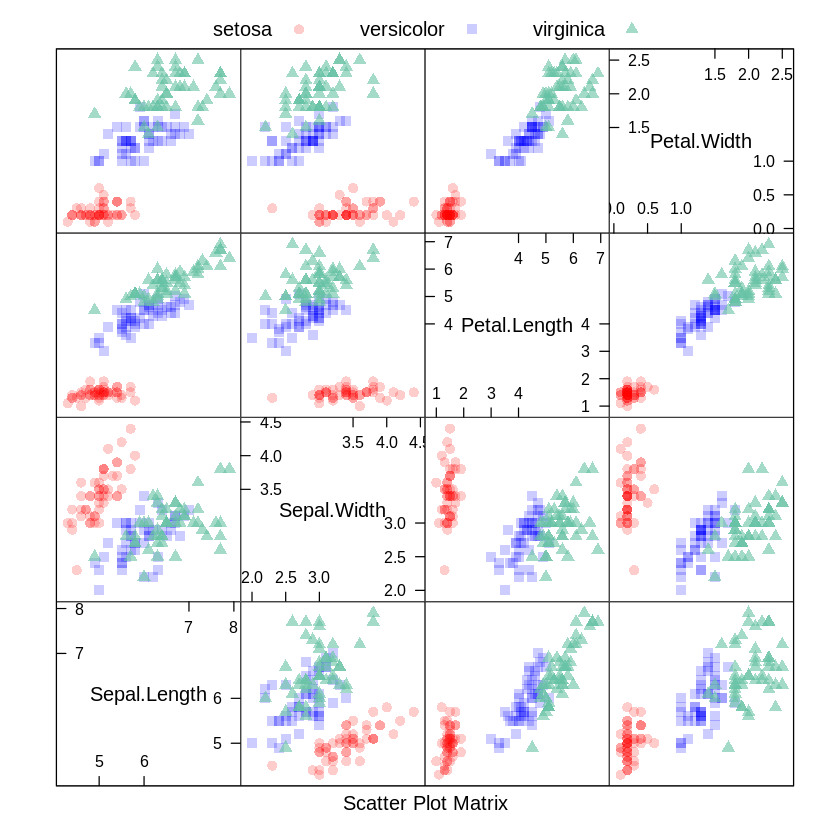

In [37]:
transparentTheme(trans = .2) 
caret::featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "pairs",
            ## Add a key at the top
            auto.key = list(columns = 3))

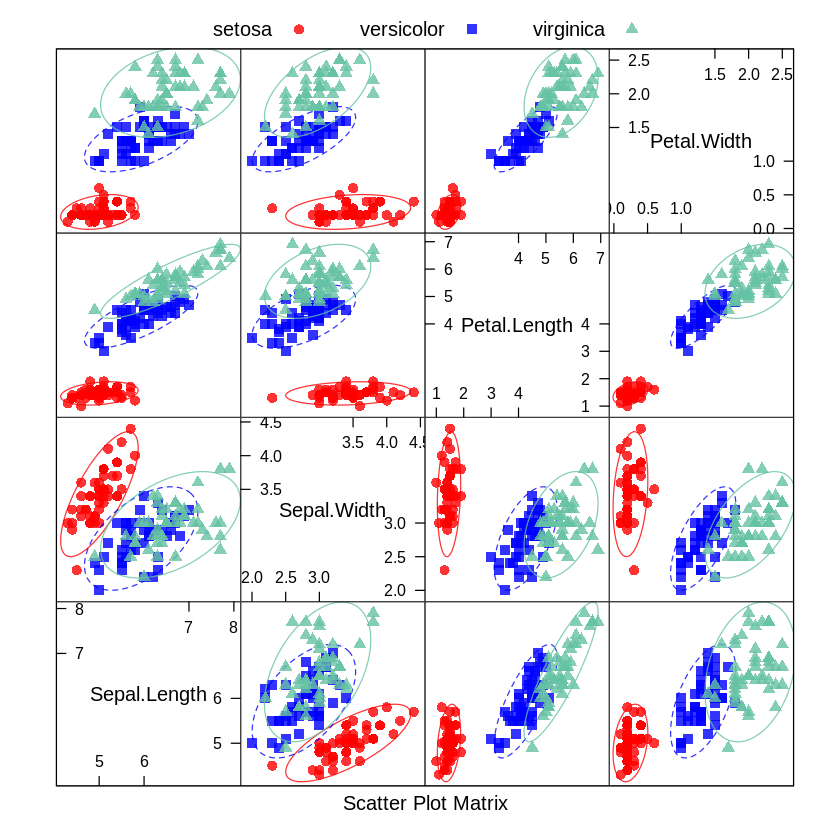

In [40]:
transparentTheme(trans = .8) 
caret:: featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "ellipse",
            ## Add a key at the top
            auto.key = list(columns = 3))

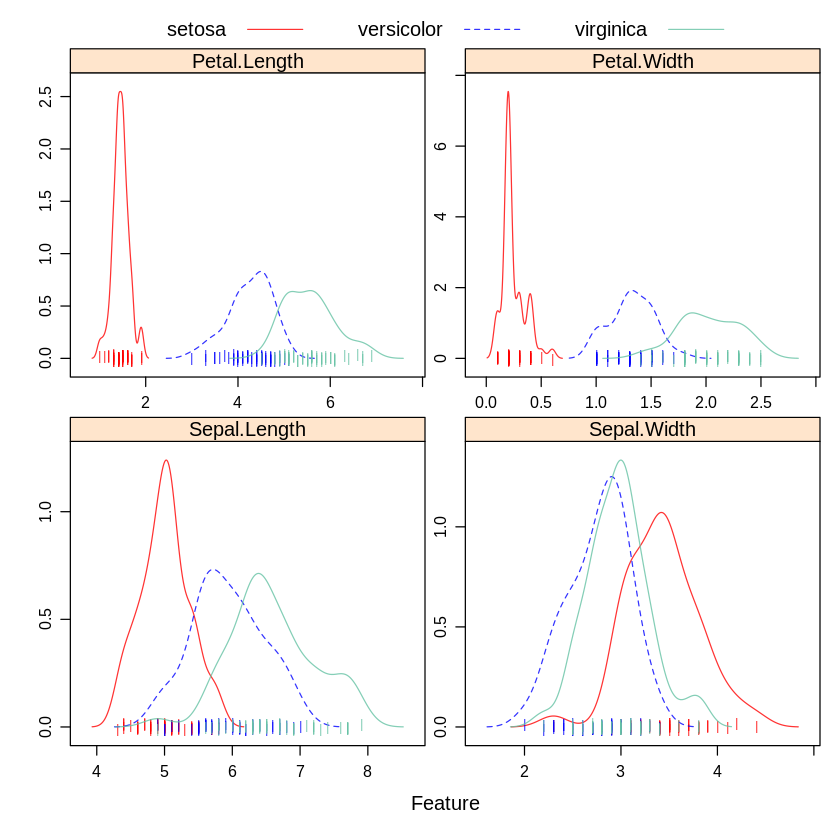

In [56]:
transparentTheme(trans = .8)
featurePlot(x = iris[, 1:4], 
            y = iris$Species,
            plot = "density", 
            scales = list(x = list(relation="free"), 
                          y = list(relation="free")), 
                          adjust = 1, #평활
                          pch = "|", 
                         # layout = c(4, 1), 

            auto.key = list(columns = 3))

In [ ]:
featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "box", 
            ## Pass in options to bwplot() 
            scales = list(y = list(relation="free"),
                          x = list(rot = 90)),  
            layout = c(4,1 ), 
            auto.key = list(columns = 2))

In [6]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             1000  
Number of columns          21    
_______________________          
Column type frequency:           
  numeric                  21    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable                  n_missing complete_rate    mean       sd  p0
 1 credit.rating                          0             1    0.7     0.458   0
 2 account.balance                        0             1    2.18    0.836   1
 3 credit.duration.months                 0             1   20.9    12.1     4
 4 previous.credit.payment.status         0             1    2.29    0.621   1
 5 credit.purpose                         0             1    2.96    0.972   1
 6 credit.amount                          0             1 3271.   2823.    250
 7 savings        

In [13]:
#glimpse(df)
dplyr::glimpse(df)

Rows: 1,000
Columns: 21
$ credit.rating                  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ account.balance                <int> 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, …
$ credit.duration.months         <int> 18, 9, 12, 12, 12, 10, 8, 6, 18, 24, 11…
$ previous.credit.payment.status <int> 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, …
$ credit.purpose                 <int> 2, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 1, 3, …
$ credit.amount                  <int> 1049, 2799, 841, 2122, 2171, 2241, 3398…
$ savings                        <int> 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, …
$ employment.duration            <int> 1, 2, 3, 2, 2, 1, 3, 1, 1, 1, 2, 3, 3, …
$ installment.rate               <int> 4, 2, 2, 3, 4, 1, 1, 2, 4, 1, 2, 1, 1, …
$ marital.status                 <int> 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 4, 1, …
$ guarantor                      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ residence.duration             <int> 4, 2, 4, 2, 4, 3, 4, 4, 4, 4, 2, 4, 4, …
$ current.assets

In [19]:
install.packages("DataExplorer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘htmlwidgets’, ‘igraph’, ‘gridExtra’, ‘networkD3’




In [ ]:
?sdf %<>% mutate_if(is.numeric, min_max_norm)

In [ ]:
?auc

In [ ]:
pre <- caret:: preProcess(x_train, method = 'range')
[출처] 빅데이터분석기사 실기 - 작업형.2(4)|작성자 김리하
# glm
model_glm <- train(x = x_train_pre, y = y_train$income, method = 'glm')
pred_glm <- predict(model_glm, newdata = x_test_pre, type = 'prob')[, '>50K']
library(ModelMetrics)
print(auc(y_test$income, predicted = pred_glm))
[출처] 빅데이터분석기사 실기 - 작업형.2(4)|작성자 김리하


In [ ]:
roc_xgb=roc(  as.numeric(pred_test$ .pred_class), as.numeric(test$survived))
pROC::auc(roc_xgb)  #0.7768

In [ ]:
library(ModelMetrics)
print(rmse(actual = y_test$SalePrice, predicted = pred_lm)) # 16603.78
[출처] 빅데이터분석기사 실기 - 작업형.2(5)|작성자 김리하

In [20]:
?train